In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pickle

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.1.3
3.2.1


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator, 
    perform_experiments,
    Samplers, 
)
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.analysis import (feature_scoring, pairs_plotting)

from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x0000020045F561F0>)
ScalarOutcome('Dike Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs'), function=<function sum_over at 0x0000020045F561F0>)
ScalarOutcome('RfR Investment Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x0000020045F561F0>)
ScalarOutcome('Evacuation Costs', variable_name=('Expected Evacuation Costs',), function=<function sum_over at 0x0000020045F561F0>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function

# Putting the outcomes in a dataframe

In [102]:
with open('experiments_SOBOL_1000x30', 'rb') as file:
    experiments = pickle.load(file)
    
with open('outcomes_SOBOL_1000x30', 'rb') as file:
    outcomes = pickle.load(file)

In [103]:
# Store all outcome names in a list
outcome_names = list(outcomes.keys())
print(outcome_names)


['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths']


In [105]:
# Make a Dataframe with the Outcomes on the columns and the Uncertainties as rows
Si = sobol.analyze(problem, outcomes["Expected Annual Damage"], calc_second_order=True, print_to_console=True)

C:\Users\mmtud\anaconda3\envs\gds\lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                                   ST       ST_conf
A.0_ID flood wave shape  6.344984e-03  6.760471e-04
A.1_Bmax                 2.727820e-04  2.368748e-04
A.1_Brate                3.558831e-06  6.603496e-06
A.1_pfail                3.336354e-01  2.536051e-02
A.2_Bmax                 5.896626e-05  5.375472e-05
A.2_Brate                1.639663e-06  8.772519e-07
A.2_pfail                1.761456e-01  1.288804e-02
A.3_Bmax                 7.950504e-06  4.475444e-06
A.3_Brate                7.744179e-07  5.384370e-07
A.3_pfail                3.139702e-01  2.367365e-02
A.4_Bmax                 2.561704e-05  1.460922e-05
A.4_Brate                1.335162e-06  7.145531e-07
A.4_pfail                2.472599e-03  2.669948e-04
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                5.926904e-02  5.880256e-03
discount rate 0          3.753215e-02  3.107266e-03
discount rate 1          8.521419e-03  1.448591e-03
discount rat

In [106]:
Si_filter = {k:Si[k] for k in ['ST','ST_conf', 'S1', 'S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

In [108]:
display(Si_df)

,ST,ST_conf,S1,S1_conf
A.0_ID flood wave shape,6.344984e-03,6.760471e-04,0.001161,0.001514
A.1_Bmax,2.727820e-04,2.368748e-04,-0.000042,0.000084
A.1_Brate,3.558831e-06,6.603496e-06,0.000014,0.000012
A.1_pfail,3.336354e-01,2.536051e-02,0.326208,0.041771
A.2_Bmax,5.896626e-05,5.375472e-05,-0.000154,0.000191
A.2_Brate,1.639663e-06,8.772519e-07,0.000050,0.000059
A.2_pfail,1.761456e-01,1.288804e-02,0.168530,0.019471
A.3_Bmax,7.950504e-06,4.475444e-06,0.000015,0.000051
A.3_Brate,7.744179e-07,5.384370e-07,0.000005,0.000009
A.3_pfail,3.139702e-01,2.367365e-02,0.291700,0.031389


In [109]:
results_dict = {}

for outcome in outcome_names:
    # Perform the Sobol analysis for each outcome
    Si = sobol.analyze(problem, outcomes[outcome], calc_second_order=True, print_to_console=False)
    
    # Filter the results
    Si_filter = {k: Si[k] for k in ['ST', 'ST_conf', 'S1', 'S1_conf']}
    
    # Create a DataFrame from the filtered results
    Si_df = pd.DataFrame(Si_filter, index=problem['names'])
    
    # Store the DataFrame in the results dictionary
    results_dict[outcome] = Si_df

# Concatenate all the DataFrames in the results dictionary into a single DataFrame
# Use MultiIndex to handle multiple outcomes
final_df = pd.concat(results_dict, axis=1)

# Display the final DataFrame
display(final_df)

C:\Users\mmtud\anaconda3\envs\gds\lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Expected Annual Damage                          \
                                            ST       ST_conf        S1   
A.0_ID flood wave shape           6.344984e-03  7.192263e-04  0.001161   
A.1_Bmax                          2.727820e-04  2.822530e-04 -0.000042   
A.1_Brate                         3.558831e-06  5.603574e-06  0.000014   
A.1_pfail                         3.336354e-01  3.035136e-02  0.326208   
A.2_Bmax                          5.896626e-05  4.730568e-05 -0.000154   
A.2_Brate                         1.639663e-06  9.625209e-07  0.000050   
A.2_pfail                         1.761456e-01  1.375198e-02  0.168530   
A.3_Bmax                          7.950504e-06  4.522779e-06  0.000015   
A.3_Brate                         7.744179e-07  7.268108e-07  0.000005   
A.3_pfail                         3.139702e-01  2.463411e-02  0.291700   
A.4_Bmax                          2.561704e-05  1.547834e-05  0.000034   
A.4_Brate                         1.335162e-06  7.267579e-07 -0.000004   
A.4_pfail                         2.472599e-03  2.960726e-04  0.001528   
A.5_Bmax                          0.000000e+00  0.000000e+00  0.000000   
A.5_Brate                         0.000000e+00  0.000000e+00  0.000000   
A.5_pfail                         5.926904e-02  5.812893e-03  0.052256   
discount rate 0                   3.753215e-02  2.920704e-03  0.005941   
discount rate 1                   8.521419e-03  1.538258e-03  0.003121   
discount rate 2                   5.842216e-04  1.754932e-04  0.000065   

                                  Dike Investment Costs                       \
                          S1_conf                    ST ST_conf   S1 S1_conf   
A.0_ID flood wave shape  0.001525                   0.0     0.0  0.0     0.0   
A.1_Bmax                 0.000097                   0.0     0.0  0.0     0.0   
A.1_Brate                0.000011                   0.0     0.0  0.0     0.0   
A.1_pfail                0.045507                   0.0     0.0  0.0     0.0   
A.2_Bmax                 0.000155                   0.0     0.0  0.0     0.0   
A.2_Brate                0.000066                   0.0     0.0  0.0     0.0   
A.2_pfail                0.019252                   0.0     0.0  0.0     0.0   
A.3_Bmax                 0.000053                   0.0     0.0  0.0     0.0   
A.3_Brate                0.000009                   0.0     0.0  0.0     0.0   
A.3_pfail                0.031086                   0.0     0.0  0.0     0.0   
A.4_Bmax                 0.000053                   0.0     0.0  0.0     0.0   
A.4_Brate                0.000013                   0.0     0.0  0.0     0.0   
A.4_pfail                0.000949                   0.0     0.0  0.0     0.0   
A.5_Bmax                 0.000000                   0.0     0.0  0.0     0.0   
A.5_Brate                0.000000                   0.0     0.0  0.0     0.0   
A.5_pfail                0.007918                   0.0     0.0  0.0     0.0   
discount rate 0          0.004602                   0.0     0.0  0.0     0.0   
discount rate 1          0.002410                   0.0     0.0  0.0     0.0   
discount rate 2          0.000663                   0.0     0.0  0.0     0.0   

                        RfR Investment Costs                       \
                                          ST ST_conf   S1 S1_conf   
A.0_ID flood wave shape                  0.0     0.0  0.0     0.0   
A.1_Bmax                                 0.0     0.0  0.0     0.0   
A.1_Brate                                0.0     0.0  0.0     0.0   
A.1_pfail                                0.0     0.0  0.0     0.0   
A.2_Bmax                                 0.0     0.0  0.0     0.0   
A.2_Brate                                0.0     0.0  0.0     0.0   
A.2_pfail                                0.0     0.0  0.0     0.0   
A.3_Bmax                                 0.0     0.0  0.0     0.0   
A.3_Brate                                0.0     0.0  0.0     0.0   
A.3_pfail                    

In [114]:
print(final_df.head(5))

                        Expected Annual Damage                                \
                                            ST   ST_conf        S1   S1_conf   
A.0_ID flood wave shape               0.006345  0.000719  0.001161  0.001525   
A.1_Bmax                              0.000273  0.000282 -0.000042  0.000097   
A.1_Brate                             0.000004  0.000006  0.000014  0.000011   
A.1_pfail                             0.333635  0.030351  0.326208  0.045507   
A.2_Bmax                              0.000059  0.000047 -0.000154  0.000155   

                        Dike Investment Costs                       \
                                           ST ST_conf   S1 S1_conf   
A.0_ID flood wave shape                   0.0     0.0  0.0     0.0   
A.1_Bmax                                  0.0     0.0  0.0     0.0   
A.1_Brate                                 0.0     0.0  0.0     0.0   
A.1_pfail                                 0.0     0.0  0.0     0.0   
A.2_Bmax           

# Analysis of the SOBOL SA

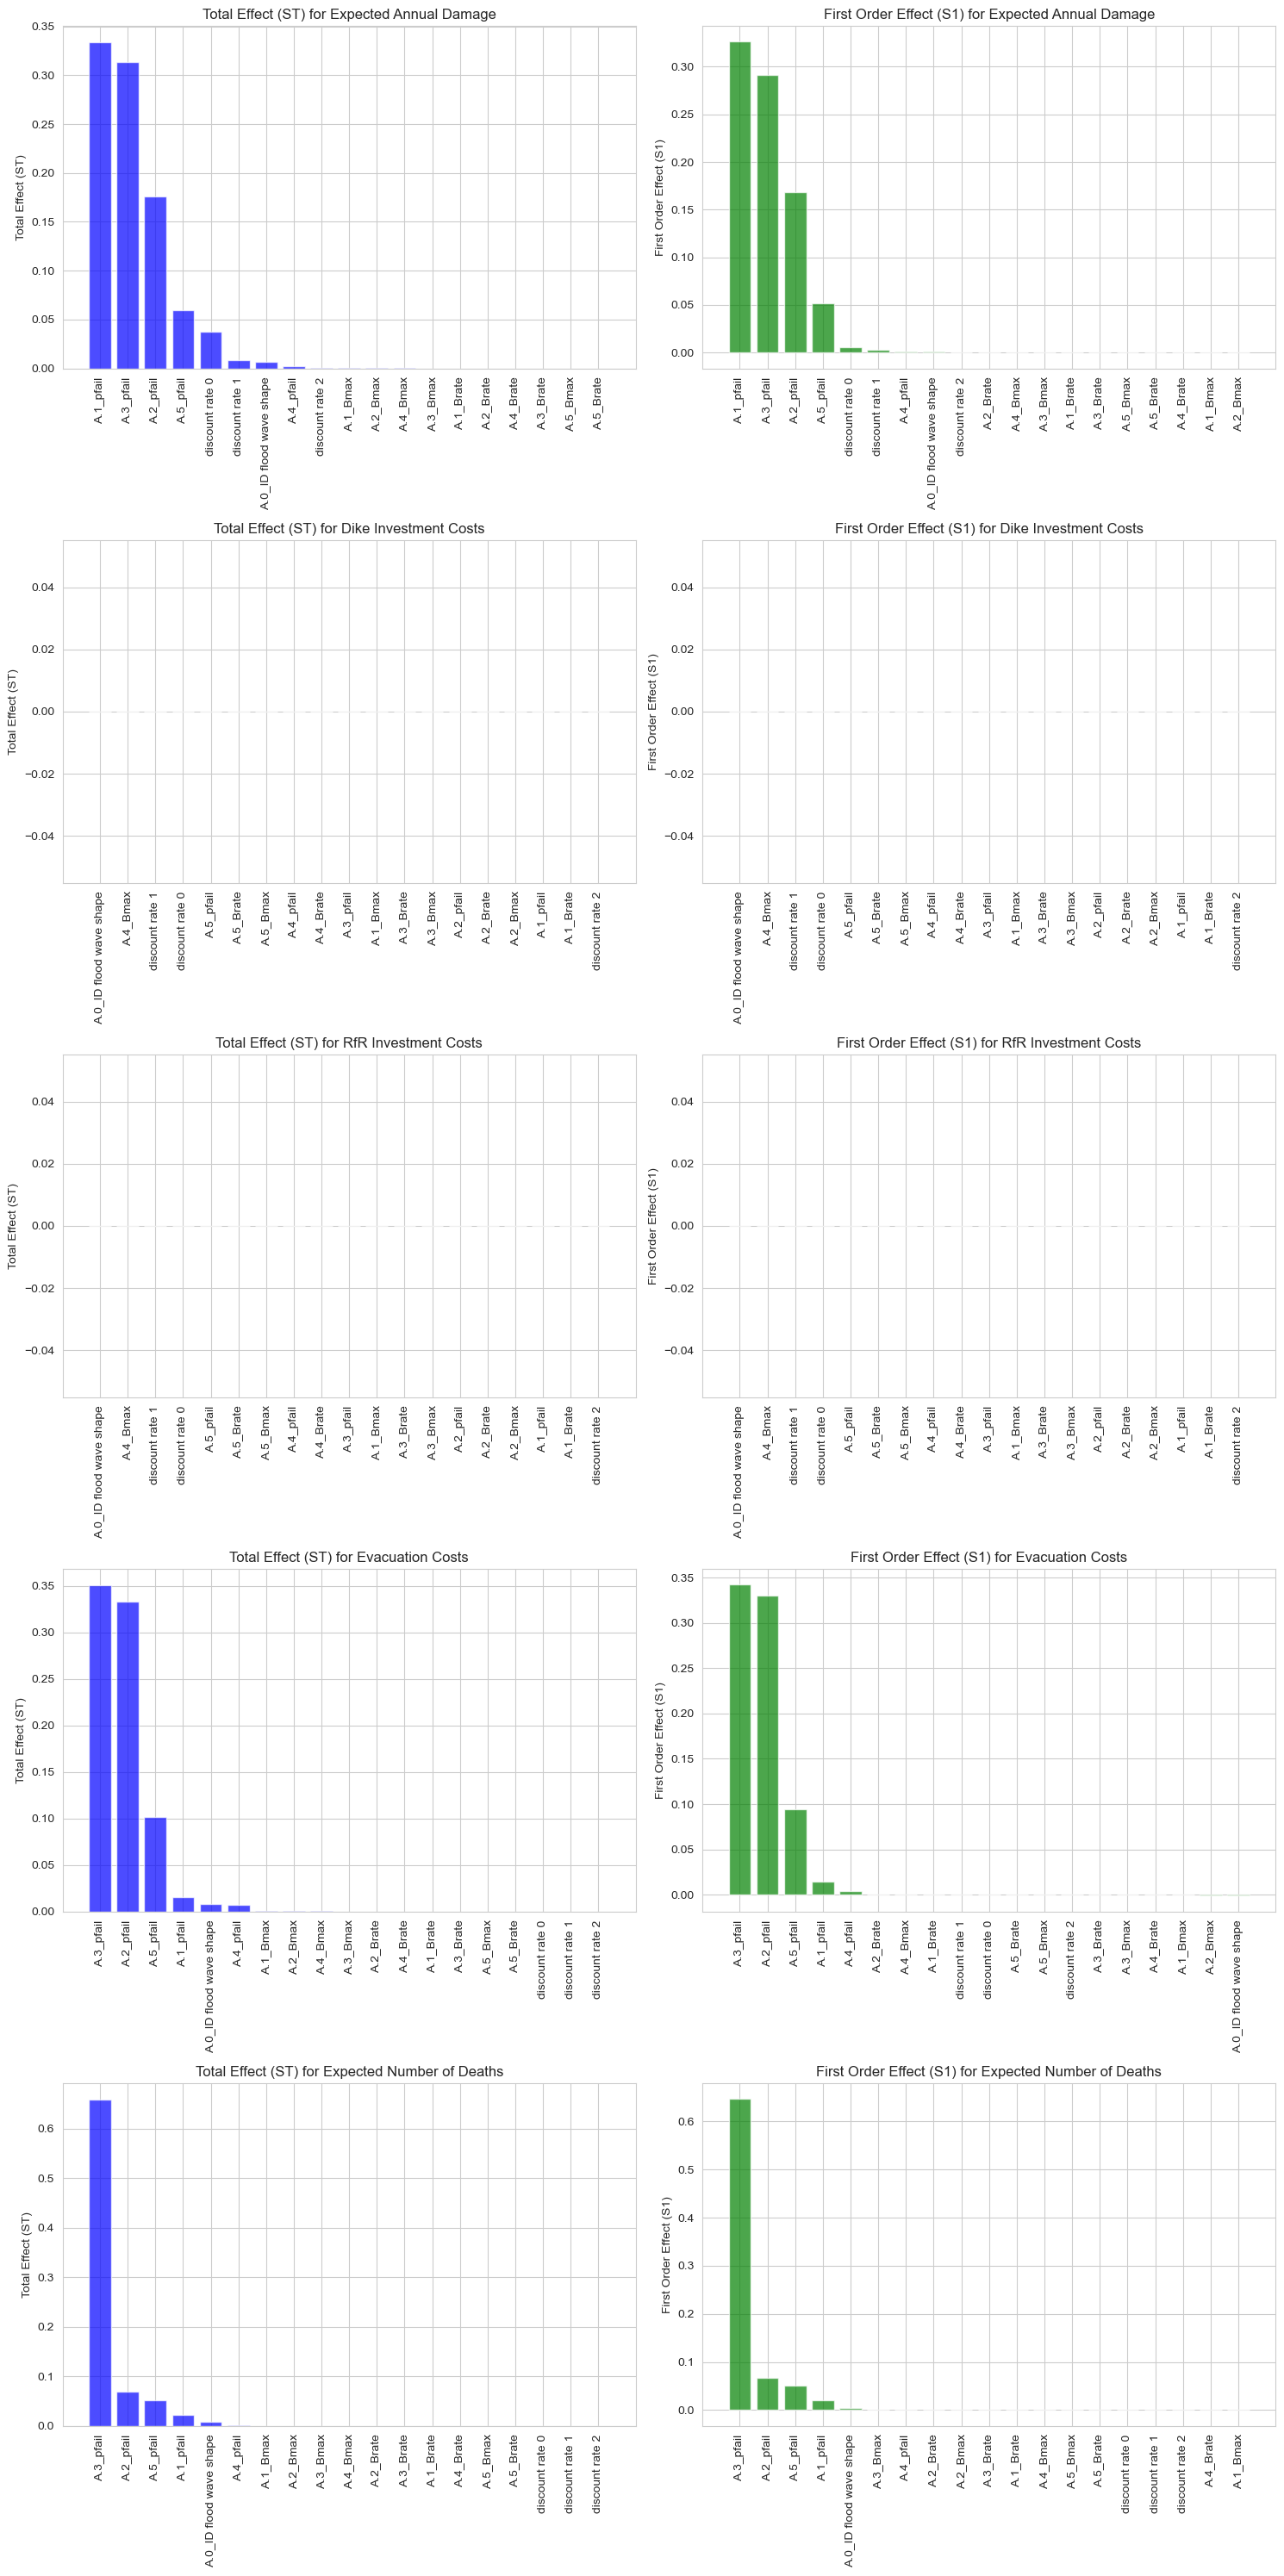

In [115]:
# Extract the unique outcomes from the columns of final_df
outcomes = final_df.columns.get_level_values(0).unique()

# Set the style for seaborn
sns.set_style('whitegrid')

# Create subplots for each outcome
fig, axes = plt.subplots(nrows=len(outcomes), ncols=2, figsize=(15, len(outcomes) * 6))
fig.subplots_adjust(hspace=0.5)

# Iterate over each outcome and plot the ST and S1 values
for i, outcome in enumerate(outcomes):
    # Extract the data for the current outcome
    st_data = final_df[outcome]['ST']
    s1_data = final_df[outcome]['S1']
    
    # Sort the data to identify the uncertainties with the highest effects
    st_sorted = st_data.sort_values(ascending=False)
    s1_sorted = s1_data.sort_values(ascending=False)
    
    # Plot the Total Effects (ST)
    axes[i, 0].bar(st_sorted.index, st_sorted.values, color='b', alpha=0.7)
    axes[i, 0].set_title(f'Total Effect (ST) for {outcome}')
    axes[i, 0].set_ylabel('Total Effect (ST)')
    axes[i, 0].tick_params(axis='x', rotation=90)
    
    # Plot the First Order Effects (S1)
    axes[i, 1].bar(s1_sorted.index, s1_sorted.values, color='g', alpha=0.7)
    axes[i, 1].set_title(f'First Order Effect (S1) for {outcome}')
    axes[i, 1].set_ylabel('First Order Effect (S1)')
    axes[i, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

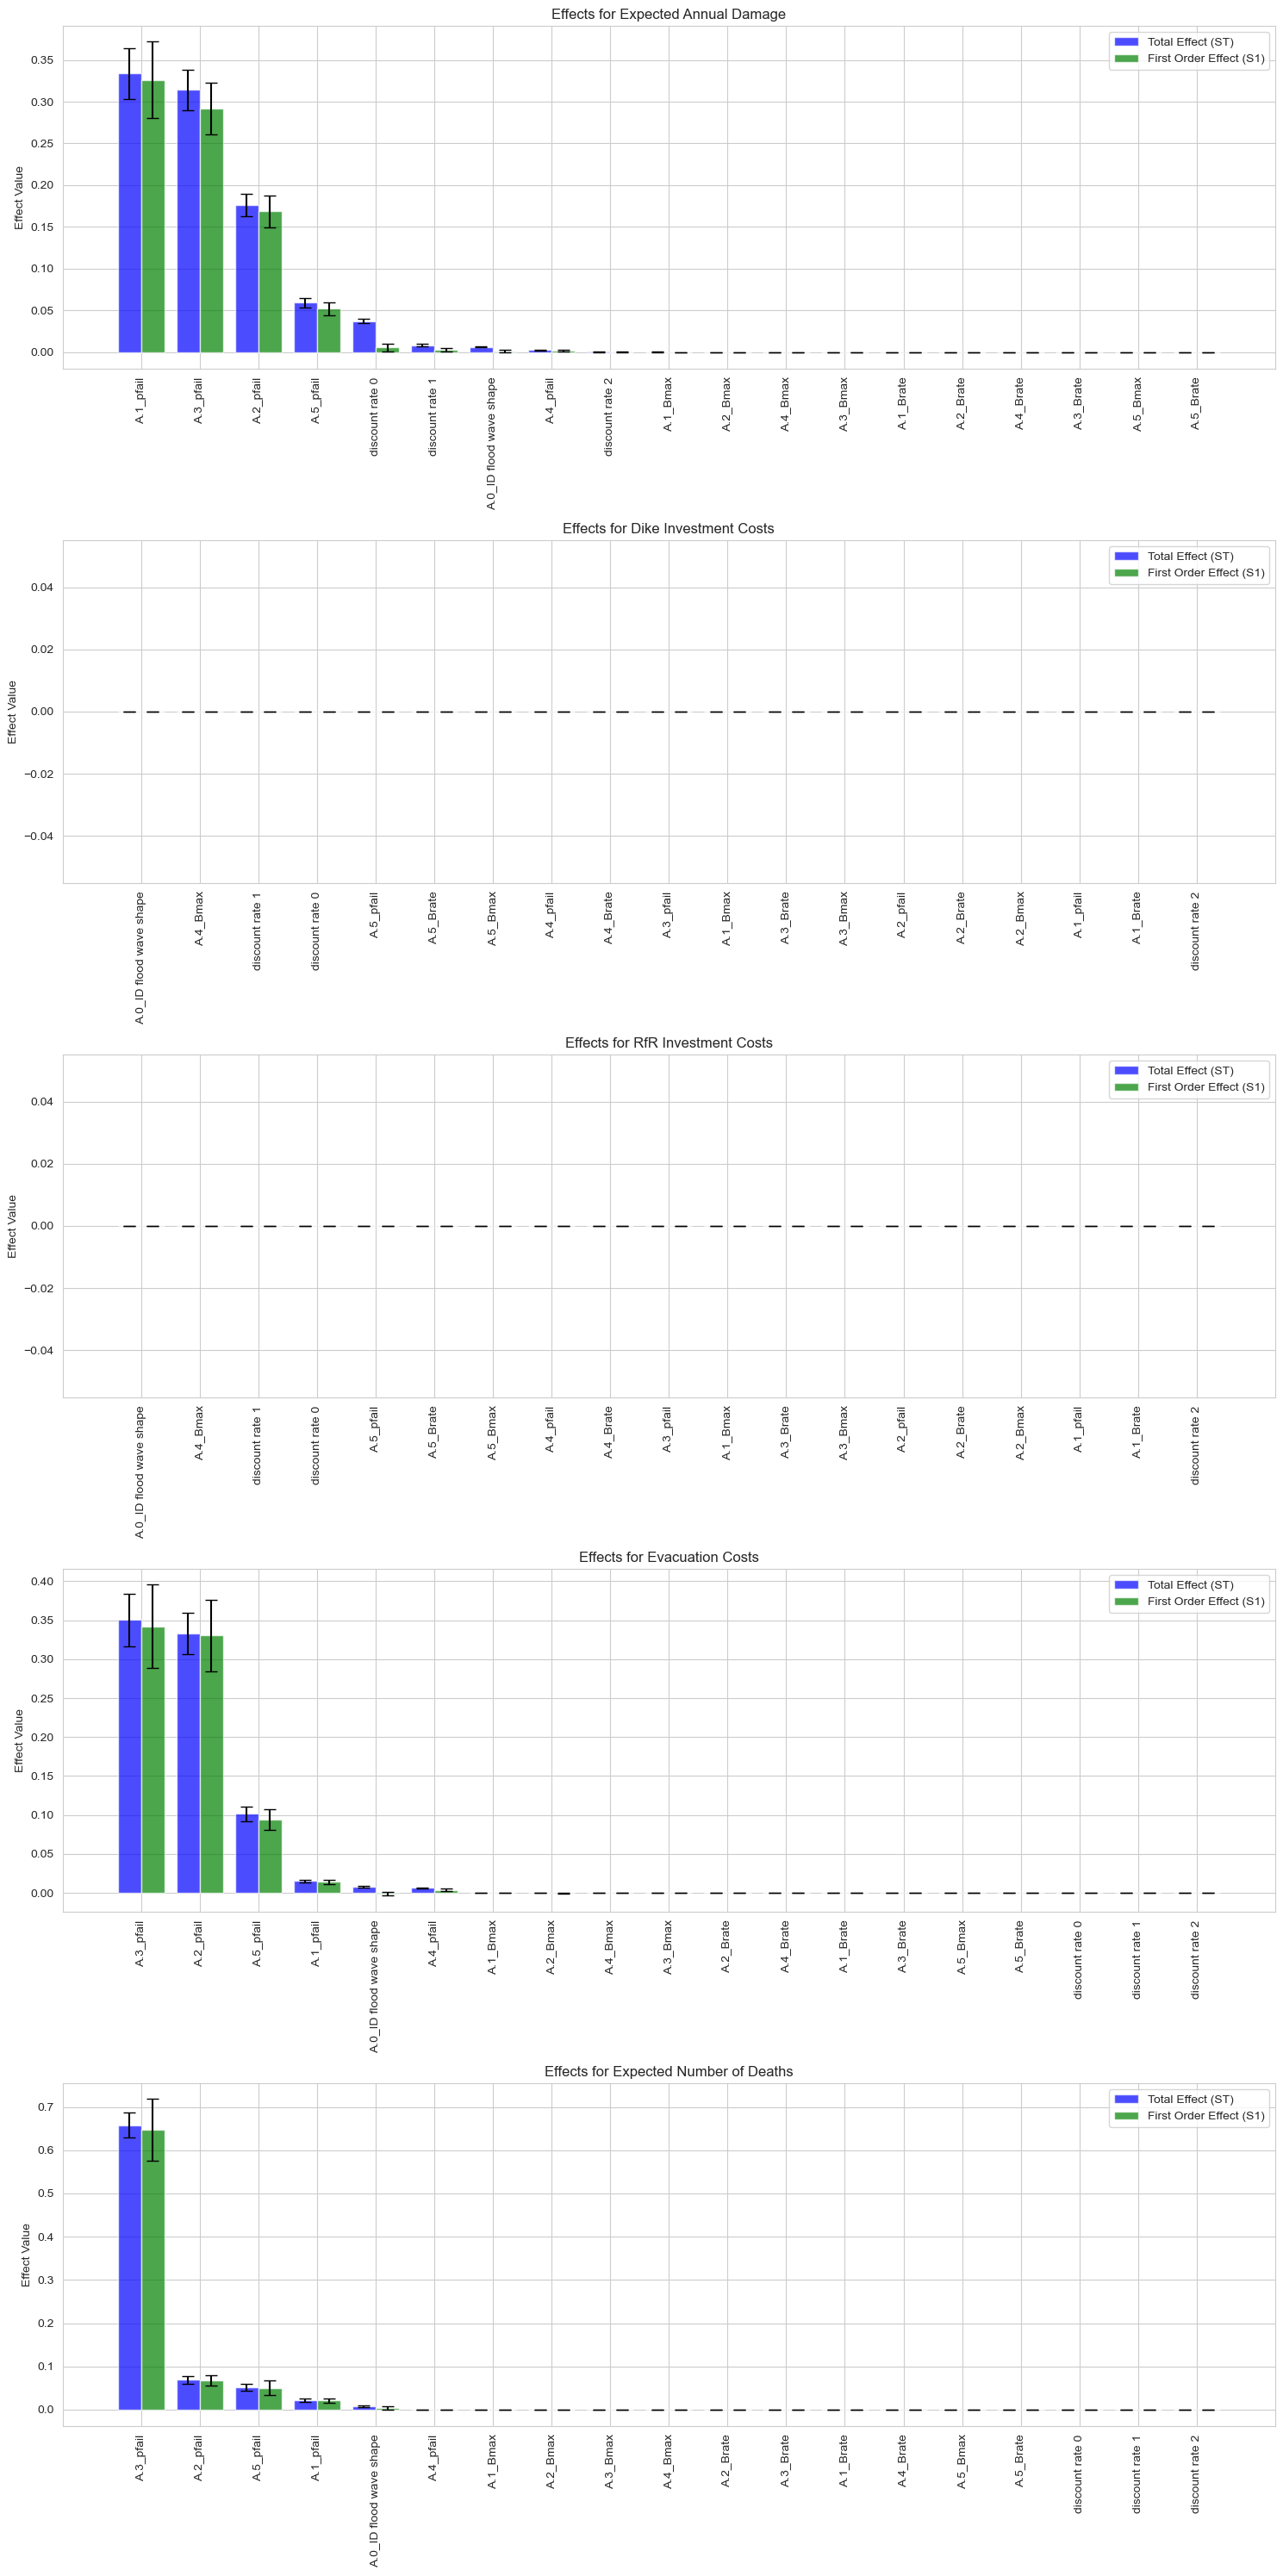

In [117]:
# Extract the unique outcomes from the columns of final_df
outcomes = final_df.columns.get_level_values(0).unique()

# Set the style for seaborn
sns.set_style('whitegrid')

# Create subplots for each outcome
fig, axes = plt.subplots(nrows=len(outcomes), ncols=1, figsize=(15, len(outcomes) * 6))
fig.subplots_adjust(hspace=0.5)

# Define the width of the bars
bar_width = 0.4

# Iterate over each outcome and plot the ST and S1 values side by side
for i, outcome in enumerate(outcomes):
    # Extract the data for the current outcome
    st_data = final_df[outcome]['ST']
    s1_data = final_df[outcome]['S1']
    st_conf = final_df[outcome]['ST_conf']
    s1_conf = final_df[outcome]['S1_conf']
    
    # Sort the data to identify the uncertainties with the highest effects
    indices = st_data.sort_values(ascending=False).index
    st_sorted = st_data.loc[indices]
    s1_sorted = s1_data.loc[indices]
    st_conf_sorted = st_conf.loc[indices]
    s1_conf_sorted = s1_conf.loc[indices]
    
    # Create the positions for the bars
    r1 = np.arange(len(st_sorted))
    r2 = [x + bar_width for x in r1]
    
    # Plot the Total Effects (ST) and First Order Effects (S1) side by side
    ax = axes[i] if len(outcomes) > 1 else axes
    ax.bar(r1, st_sorted.values, yerr=st_conf_sorted.values, width=bar_width, label='Total Effect (ST)', color='b', alpha=0.7, capsize=5)
    ax.bar(r2, s1_sorted.values, yerr=s1_conf_sorted.values, width=bar_width, label='First Order Effect (S1)', color='g', alpha=0.7, capsize=5)
    
    # Set the labels and titles
    ax.set_title(f'Effects for {outcome}')
    ax.set_ylabel('Effect Value')
    ax.set_xticks([r + bar_width/2 for r in range(len(st_sorted))])
    ax.set_xticklabels(indices, rotation=90)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()